# Practical Text Classification With Python and Keras

sources:
https://realpython.com/python-keras-text-classification/#conclusion

Before we start, let’s take a look at what data we have. Go ahead and download the data set from the [Sentiment Labelled Sentences Data Set](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) from the UCI Machine Learning Repository.

By the way, this repository is a wonderful source for machine learning data sets when you want to try out some algorithms. This data set includes labeled reviews from IMDb, Amazon, and Yelp. Each review is marked with a score of 0 for a negative sentiment or 1 for a positive sentiment.

Extract the folder into a data folder and go ahead and load the data with Pandas:


## Our problem

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

--2023-11-05 04:57:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled      [  <=>               ]  82.21K   213KB/s    in 0.4s    

2023-11-05 04:57:21 (213 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188]



In [ ]:
!mkdir 'data'
!unzip 'sentiment labelled sentences.zip' -d 'data'

Archive:  sentiment labelled sentences.zip
   creating: data/sentiment labelled sentences/
  inflating: data/sentiment labelled sentences/.DS_Store  
   creating: data/__MACOSX/
   creating: data/__MACOSX/sentiment labelled sentences/
  inflating: data/__MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: data/sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: data/sentiment labelled sentences/imdb_labelled.txt  
  inflating: data/__MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: data/sentiment labelled sentences/readme.txt  
  inflating: data/__MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: data/sentiment labelled sentences/yelp_labelled.txt  
  inflating: data/__MACOSX/._sentiment labelled sentences  


In [ ]:
import pandas as pd

filepath_dict = {'yelp':   'data/sentiment labelled sentences/yelp_labelled.txt',
                 'amazon': 'data/sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   'data/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [ ]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


## Defining a Baseline Model
When you work with machine learning, one important step is to define a baseline model. This usually involves a simple model, which is then used as a comparison with the more advanced models that you want to test. In this case, you’ll use the baseline model to compare it to the more advanced methods involving (deep) neural networks, the meat and potatoes of this tutorial.

First, you are going to split the data into a training and testing set which will allow you to evaluate the accuracy and see if your model generalizes well. This means whether the model is able to perform well on data it has not seen before. This is a way to see if the model is overfitting.

**Overfitting** is when a model is trained too well on the training data. You want to avoid overfitting, as this would mean that the model mostly just memorized the training data. This would account for a large accuracy with the training data but a low accuracy in the testing data.

We start by taking the Yelp data set which we extract from our concatenated data set. From there, we take the sentences and labels. The `.values` returns a NumPy array instead of a Pandas Series object which is in this context easier to work with:

In [ ]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

Here we will use again on the  BOW model to vectorize the sentences. You can use again the CountVectorizer for this task. Since you might not have the testing data available during training, you can create the vocabulary using only the training data. Using this vocabulary, you can create the feature vectors for each sentence of the training and testing set:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.shape

(750, 1714)

You can see that the resulting feature vectors have 750 samples which are the number of training samples we have after the train-test split. Each sample has 1714 dimensions which is the size of the vocabulary. Also, you can see that we get a *sparse matrix*. This is a data type that is optimized for matrices with only a few non-zero elements, which only keeps track of the non-zero elements reducing the memory load.


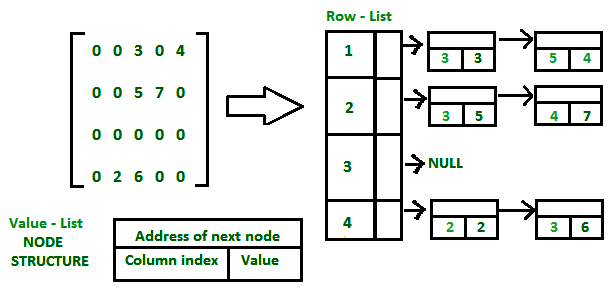


`CountVectorizer` performs tokenization which separates the sentences into a set of tokens as you saw previously in the vocabulary. It additionally removes punctuation and special characters and can apply other preprocessing to each word. If you want, you can use a custom tokenizer from the NLTK library with the `CountVectorizer` or use any number of the customizations which you can explore to improve the performance of your model.

The classification model we are going to use is the **logistic regression** which is a simple yet powerful linear model that is mathematically speaking in fact a form of regression between 0 and 1 based on the input feature vector. By specifying a cutoff value (by default 0.5), the regression model is used for classification. You can use again scikit-learn library which provides the `LogisticRegression` classifier:

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


You can see that the logistic regression reached an impressive 79.6%, but let’s have a look how this model performs on the other data sets that we have. In this script, we perform and evaluate the whole process for each data set that we have:

## Deep Neural Networks for Text Classification

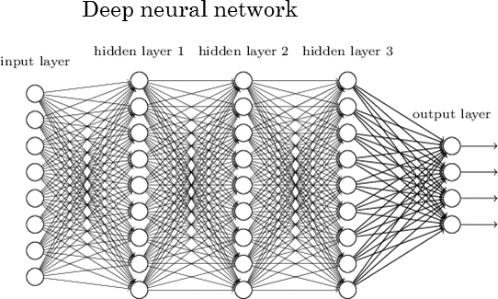

The we are going to use **Sequential model** to stack layers lineary, where you can use the large variety of available layers in Keras. The most common layer is the **Dense** layer which is your regular densely connected neural network layer with all the weights and biases that you are already familiar with.

Let’s see if we can achieve some improvement to our previous logistic regression model. You can use the `X_train` and `X_test` arrays that you built in our earlier example.

Before we build our model, we need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference. In order to build the Sequential model, you can add layers one by one in order as follows:

In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
print('features#', input_dim)

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

features# 1714


Note: *The use of ReLU function thus prevents the gradient from vanishing.*

Before you can start with the training of the model, you need to configure the learning process. This is done with the `.compile()` method. This method specifies the optimizer and the loss function.

Additionally, you can add a list of metrics which can be later used for evaluation, but they do not influence the training. In this case, we want to use the binary cross entropy and the Adam optimizer you saw in the primer mentioned before. Keras also includes a handy `.summary()` function to give an overview of the model and the number of parameters available for training:

In [ ]:
model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                17150     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17161 (67.04 KB)
Trainable params: 17161 (67.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You might notice that we have 17150 parameters for the first layer and another 11 in the second one. Where did those come from?

See, we have 1714 dimensions for each feature vector, and then we have 10 nodes. We need weights for each feature dimension and each node which accounts for 1714 * 10 = 17140 parameters, and then we have another 10 times an added bias for each node, which gets us the 17150 parameters. In the final node, we have another 10 weights and one bias, which gets us to 11 parameters. That’s a total of 17161 parameters for both layers.

Neat! You are almost there. Now it is time to start your training with the `.fit()` function.

Since the training in neural networks is an iterative process, the training won’t just stop after it is done. You have to specify the number of iterations you want the model to be training. Those completed iterations are commonly called **epochs**. We want to run it for 100 epochs to be able to see how the training loss and accuracy are changing after each epoch.

Another parameter you have to your selection is the **batch size**. The batch size is responsible for how many samples we want to use in one epoch, which means how many samples are used in one forward/backward pass. This increases the speed of the computation as it need fewer epochs to run, but it also needs more memory, and the model may degrade with larger batch sizes. Since we have a small training set, we can leave this to a low batch size:

In [ ]:
#convert the sparse X_train to dense
X_train = X_train.todense()
X_test = X_test.todense()

In [ ]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_split = 0.2,
                     batch_size=10)

Now you can use the `.evaluate()` method to measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy then for the testing data. The longer you would train a neural network, the more likely it is that it starts overfitting.

Note that if you rerun the `.fit()` method, you’ll start off with the computed weights from the previous training. Make sure to call `clear_session()` before you start training the model again:

In [ ]:
from keras.backend import clear_session
clear_session()

Now let’s evaluate the accuracy of the model:

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9547
Testing Accuracy:  0.7760


You can already see that the model was overfitting since it reached 100% accuracy for the training set. But this was expected since the number of epochs was fairly large for this model. However, the accuracy of the testing set has already surpassed our previous logistic Regression with BOW model, which is a great step further in terms of our progress.

To make your life easier, you can use this little helper function to visualize the loss and accuracy for the training and testing data based on the History callback. This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the `.fit()` method. In this case, we are only interested in the accuracy. This helper function employs the matplotlib plotting library:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

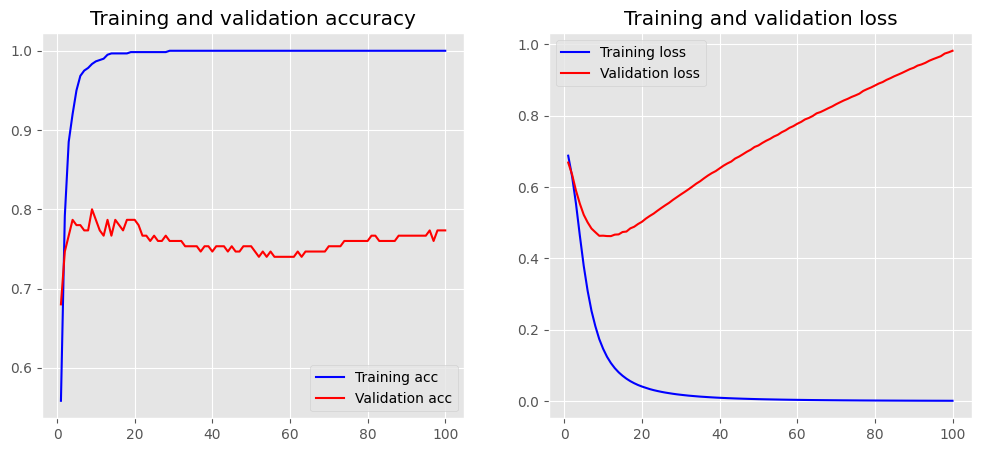

In [ ]:
plot_history(history)

ou can see that we have trained our model for too long since the training set reached 100% accuracy. A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.

Note: When training neural networks, you should use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

This makes sure that you don’t overfit the model. Using the validation set to choose the best model is a form of data leakage (or “cheating”) to get to pick the result that produced the best test score out of hundreds of them. Data leakage happens when information outside the training data set is used in the model.

As we have covered before, (deep) neural networks perform best when you have a very large number of samples. In the next part, you’ll see a different way to represent words as vectors. This is a very exciting and powerful way to work with words where you’ll see how to represent words as dense vectors.

## Better Feature Representation: Word Embedding
in previous lecture we saw some methods to vectroize text
some problems with it:
- words are not independent and ordering does matter
- raw counts matrix is sparse, which leads to: requries a lot of storage, increases the model complixity, and the resulted model is not robust.
- remove stop words can lead to problems, for example:


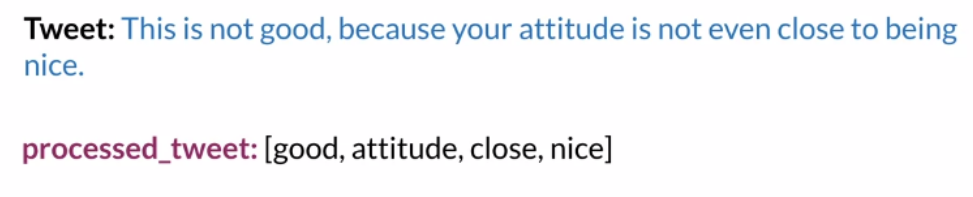


- sarcasm, irony!
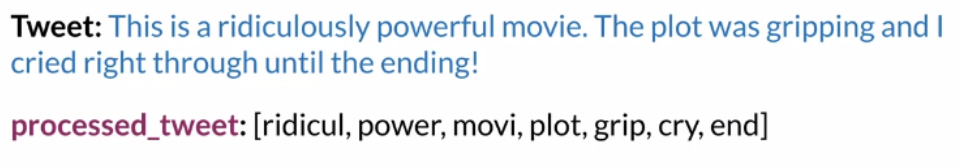

- vector is very high dimentional
- meaning is not preserved, for example:
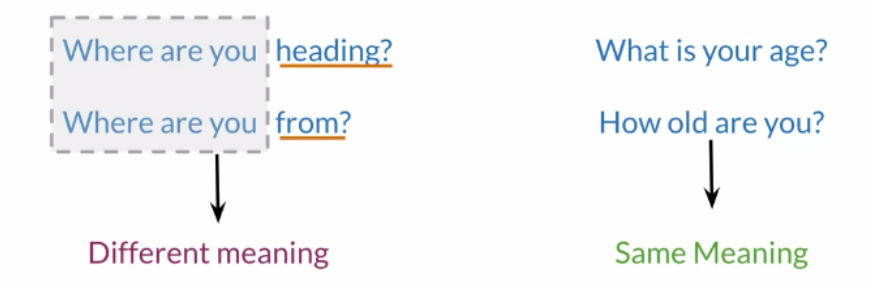

Text is considered a form of sequence data similar to time series data that you would have in weather data or financial data. In the previous BOW model, you have seen how to represent a whole sequence of words as a single feature vector. Now you will see how to represent each word as vectors. There are various ways to vectorize text, such as:

- Words represented by each word as a vector
- Characters represented by each character as a vector
- N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text)

In this tutorial, you’ll see how to deal with representing words as vectors which is the common way to use text in neural networks. Two possible ways to represent a word as a vector are **one-hot encoding** and **word embeddings**.

### One-Hot Encoding
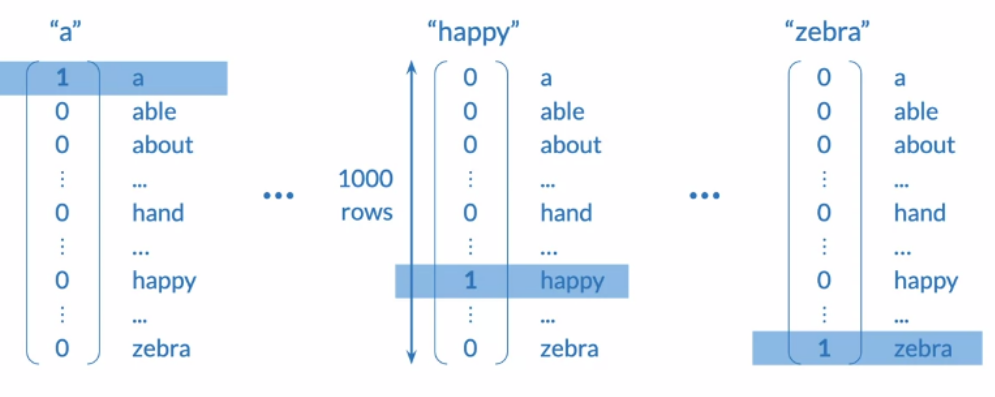


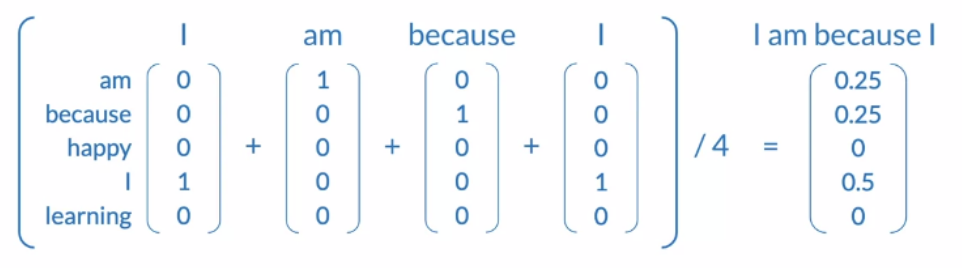

The first way to represent a word as a vector is by creating a so-called one-hot encoding, which is simply done by taking a vector of the length of the vocabulary with an entry for each word in the corpus.

In this way, you have for each word, given it has a spot in the vocabulary, a vector with zeros everywhere except for the corresponding spot for the word which is set to one. As you might imagine, this can become a fairly large vector for each word and it does not give any additional information like the relationship between words.

Let’s say you have a list of cities as in the following example:

In [ ]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

You can use scikit-learn and the `LabelEncoder` to encode the list of cities into categorical integer values like here:

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)
city_labels

array([1, 0, 0, 2, 1])

Using this representation, you can use the `OneHotEncoder` provided by scikit-learn to encode the categorical values we got before into a one-hot encoded numeric array. `OneHotEncoder` expects each categorical value to be in a separate row, so you’ll need to reshape the array, then you can apply the encoder:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape((5, 1))
print(city_labels)
encoder.fit_transform(city_labels)

[[1]
 [0]
 [0]
 [2]
 [1]]


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

You can see that categorical integer value represents the position of the array which is 1 and the rest is 0. This is often used when you have a categorical feature which you cannot represent as a numeric value but you still want to be able to use it in machine learning. One use case for this encoding is of course words in a text but it is most prominently used for categories. Such categories can be for example city, department, or other categories.

hot-vectors are:
- simple
- Hugs vectors
- no embedded meaning
- There is no natural notion of similarity for one-hot vectors:<br>

> motel = <font color=orange>[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]</font><br>
hotel = <font color=orange>[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]</font><br>
V(motel) . v(hotel) = 0 !!!




### Word Embedding
“You shall know a word by the company it keeps” (J. R. Firth 1957: 11)


Word embedding is finding representation of words that capture semantic similarity between them among other properties, where the distance between vectors for words with close meanings (“king” and “queen” for example) are closer than distance for words with complety different meanings (“king” and “carpet” for example).

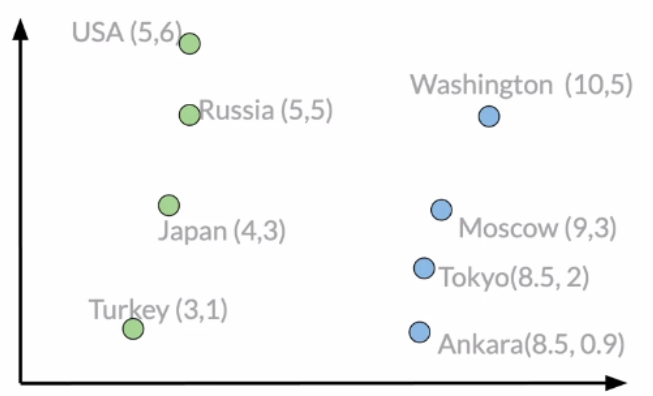

Note that the word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the **embedding space**.

``` word embedding paramaterized function mapping words in some language to high-dimensional vectors (perhaps 200 to 500 dimensions).```

It called also **Distributional semantics**: because you can think of the distribution of words that show up around the word as a way to define the meaning that word.

this would map semantically similar words close on the embedding space like numbers or colors. If the embedding captures the relationship between words well, things like vector arithmetic should become possible. A famous example in this field of study is the ability to map King - Man + Woman = Queen.

How can you get such a word embedding? You have two options for this. One way is to train your word embeddings during the training of your neural network. The other way is by using pretrained word embeddings which you can directly use in your model. There you have the option to either leave these word embeddings unchanged during training or you train them also.

let's start with pretrained word embeddings:

#### word2vec
by google (2013)
used self-supervised models to learn words representaion from a large corpus.

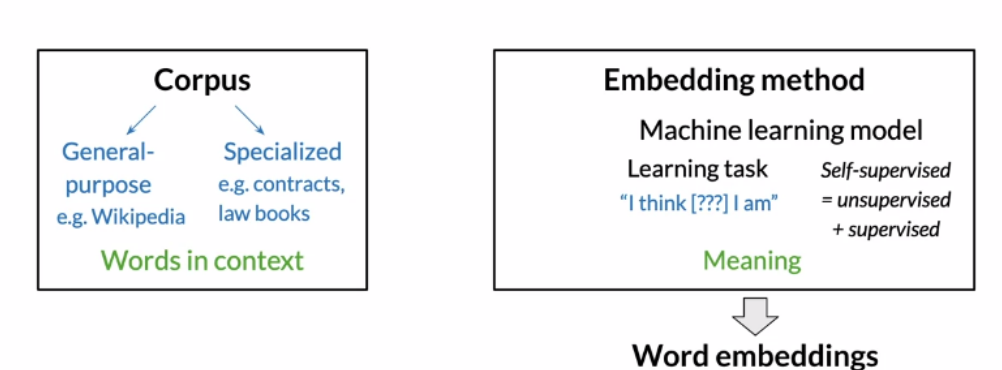

In training a `Word2Vec` model, there can actually be different ways to represent the neighboring words to predict a target word. In the original Word2Vec article, 2 different architectures were introduced. One known as **CBOW for continuous bag-of-words** and the other called **SKIPGRAM**.<br> Both are architectures to learn the underlying word representations for each word by using neural networks.

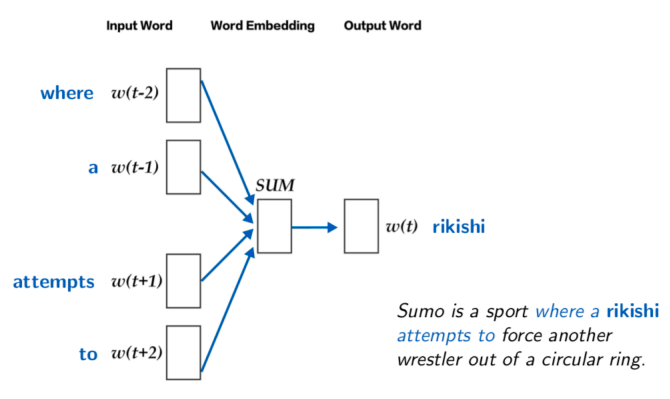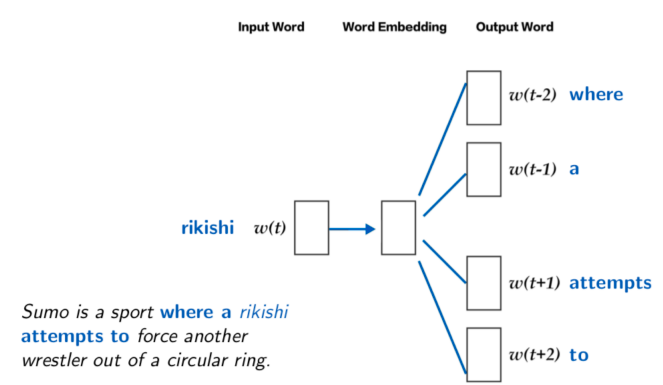

In the **CBOW** model, the distributed representations of *context* (or surrounding words) are combined to predict the word in the *middle*. While in the **Skip-gram** model, the distributed representation of the input *word* is used to predict the *context*.<br>

A prerequisite for any neural network or any supervised training technique is to have labeled training data. How do you a train a neural network to predict word embedding when you don’t have any labeled data i.e words and their corresponding word embedding?

##### Skip-gram
We’ll do so by creating a “fake” task for the neural network to train. We won’t be interested in the inputs and outputs of this network, rather the goal is actually just to learn the weights of the hidden layer that are actually the “word vectors” that we’re trying to learn.<br>

The fake task for Skip-gram model would be, *given a word, we’ll try to predict its neighboring words*. We’ll define a neighboring word by the window size — a hyper-parameter.



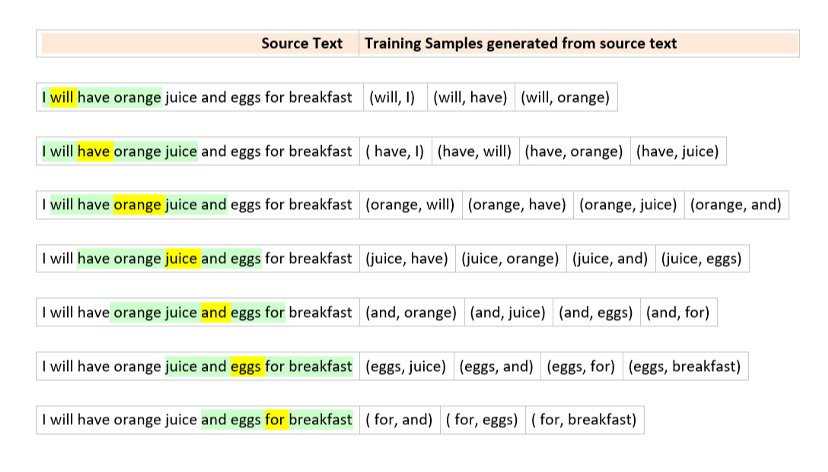

Given the sentence:<br>
*“I will have orange **juice** and eggs for breakfast.”*<br>
and a window size of 2, if the target word is juice, its neighboring words will be *( have, orange, and, eggs)*. Our input and target word pair would be *(juice, have), (juice, orange), (juice, and), (juice, eggs)*.
Also note that within the sample window, proximity of the words to the source word plays no role. So have, orange, and, and eggs will be treated the same while training.

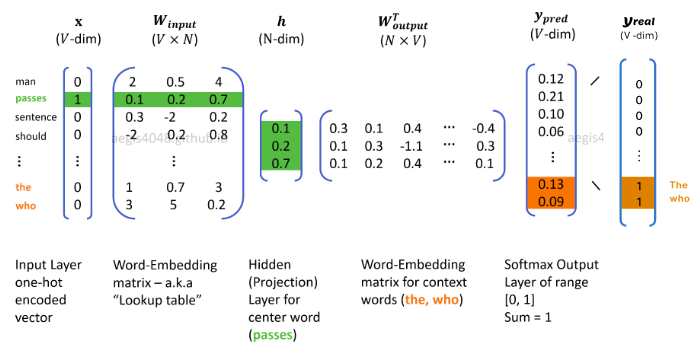

The dimensions of the **input vector/center word vector** will be ```1xV``` — where *V is the number of words in the vocabulary* — i.e one-hot representation of the word. The single **hidden layer** will have dimension ```VxE```, where *E is the size of the word embedding* and is a hyper-parameter. The output from the hidden layer would be of the dimension ```1xE```, which we will feed into an softmax layer. The dimensions of the **output/context words** layer will be ```1xV```, where each value in the vector will be the probability score of the target word at that position.

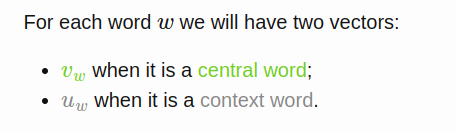

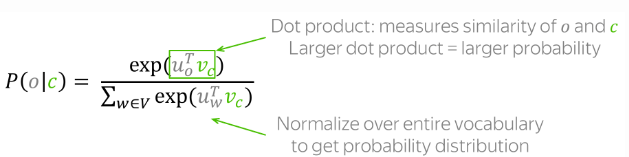


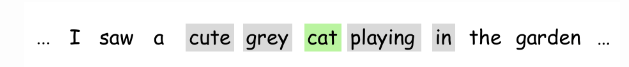

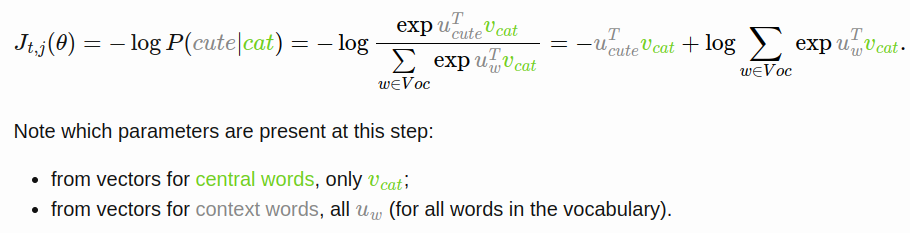

##### CBOW

in continuous bag-of-words the "fake" task is to find the center words from surronding words (context)

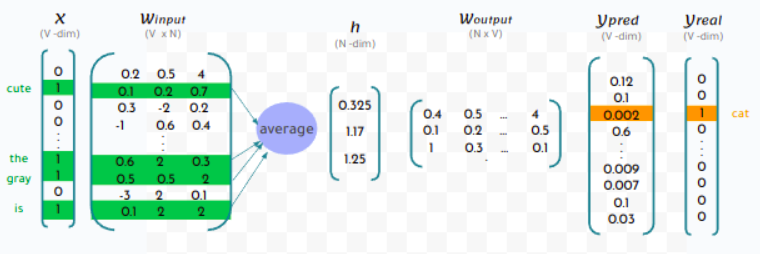

The dimension of our hidden layer and output layer will remain the same. Only the dimension of our input layer and the calculation of hidden layer activations will change, if we have 4 context words for a single target word, we will have 4 1xV input vectors. Each will be multiplied with the VxE hidden layer returning 1xE vectors. All 4 1xE vectors will be averaged element-wise to obtain the final activation which then will be fed into the softmax layer.

**Comparation**<br>
Skip-gram: works well with a small amount of the training data, represents well even rare words or phrases.<br>
CBOW: several times faster to train than the skip-gram, slightly better accuracy for the frequent words.<br>


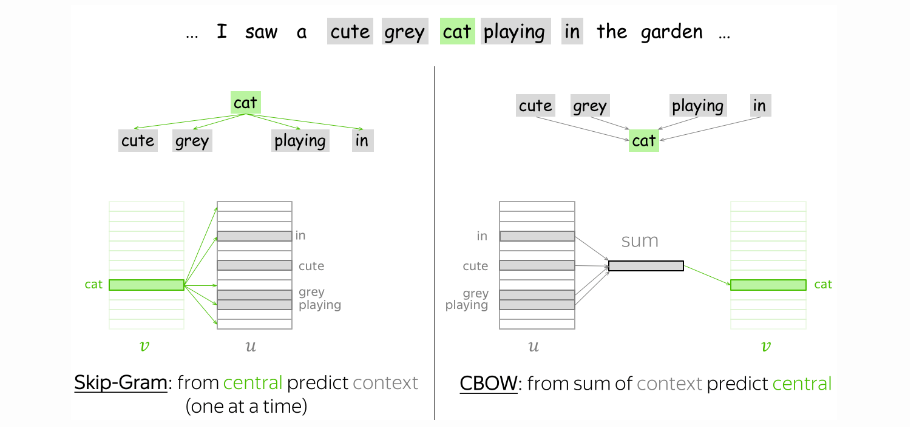

word2vec drawback:
- Needs large samples
- Slow because vocab number is very large, that make calculation of the softmax dominator very expensive.

Solutions:
- Replace softmax with hierarchical softmax: convert complexity form O(v) to O(log(v)).
- Negative sampling: convert the task to binary classification.

##### Negative Sampling

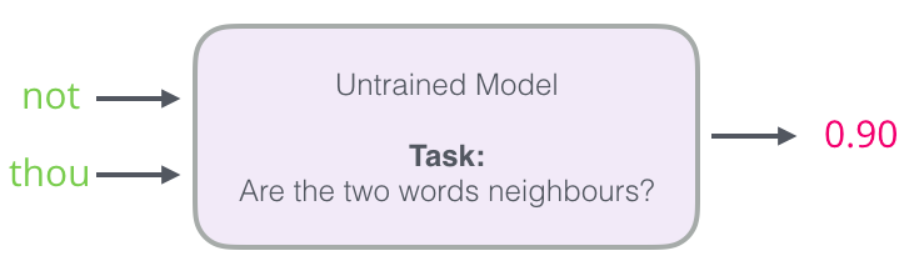

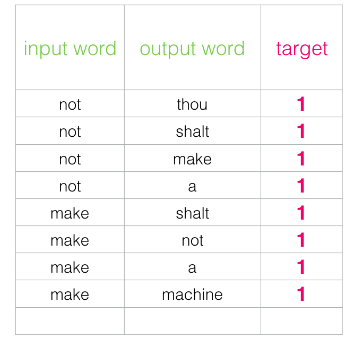

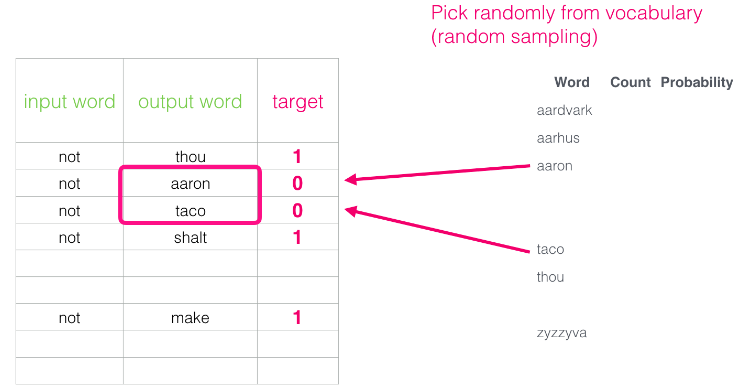

##### SkipGram with Negative Sampling

we are increasing similarity between center words and its context words vectors and decrease similarity between the center words not for all other words, but only with a subset of K "negative" examples.

Since we have a large corpus, on average over all updates we will update each vector sufficient number of times, and the vectors will still be able to learn the relationships between words quite well.

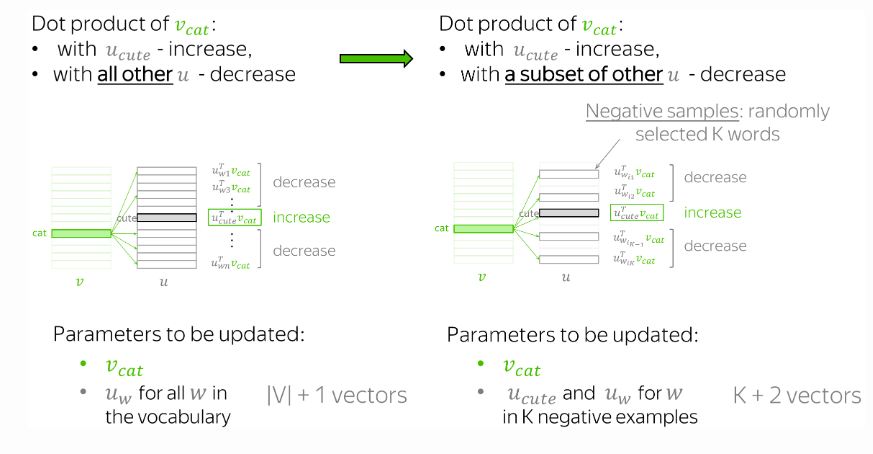

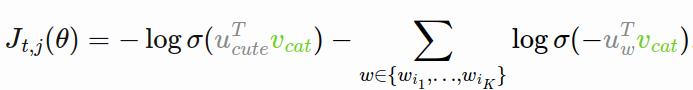

##### word2vec and gensim

In [ ]:
import gensim
import gensim.downloader as api

model = api.load('word2vec-google-news-300')
# model = api.load('fasttext-wiki-news-subwords-300')
# model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
king = model['king']
king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

**manipulating word vectors**:<br>
find semantic anologies

In [ ]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]


In [ ]:
print(model.most_similar(positive=['reagan', 'clinton'], negative=['obama']))

[('kerry', 0.5559261441230774), ('kennedy', 0.5356349945068359), ('john_mccain', 0.49141499400138855), ('dodd', 0.4867396950721741), ('lincoln', 0.4788968563079834), ('barack_obama', 0.4742375612258911), ('mccain', 0.4736894965171814), ('george_bush', 0.47286656498908997), ('hillary', 0.47239500284194946), ('wilson', 0.4718676507472992)]


In [ ]:
print(model.most_similar(positive=['long', 'tallest'], negative=['tall']))

[('longest', 0.5581464767456055), ('shortest', 0.41719678044319153), ('Long', 0.39378124475479126), ('longer', 0.3806155025959015), ('lengthiest', 0.36912617087364197), ('orange_reticulated_python', 0.36062684655189514), ('tallest_skyscraper', 0.3538769781589508), ('lengthy', 0.3530365228652954), ('MSIM_strives', 0.34830090403556824), ('forever', 0.3428654074668884)]


Problem!!

In [ ]:
try:
  model.most_similar('kneee')
except KeyError as e:
  print(e)

"Key 'kneee' not present in vocabulary"


plot word2vec vectors:<br>
use pac to plot word2vec vectors into 2D space

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

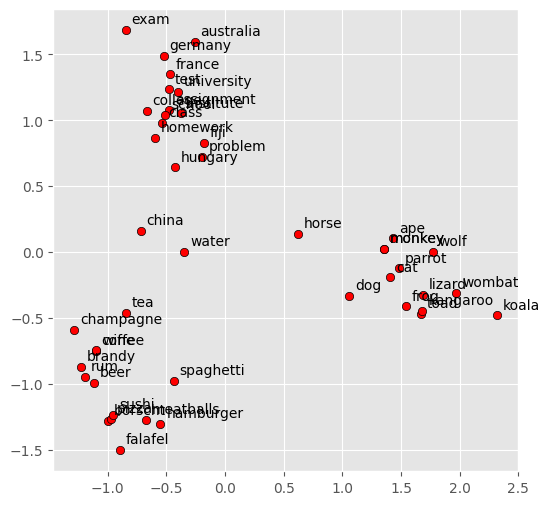

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

##### How to calculate Similarity?
- Euclidean distance: the L2-norm of a difference between vectors
- cosine similarity: dot product of two vectors and inversely proportional to the product of their magnitudes

Vectors with a small Euclidean distance from one another are located in the same region of a vector space. Vectors with a high cosine similarity are located in the same general direction from the origin.
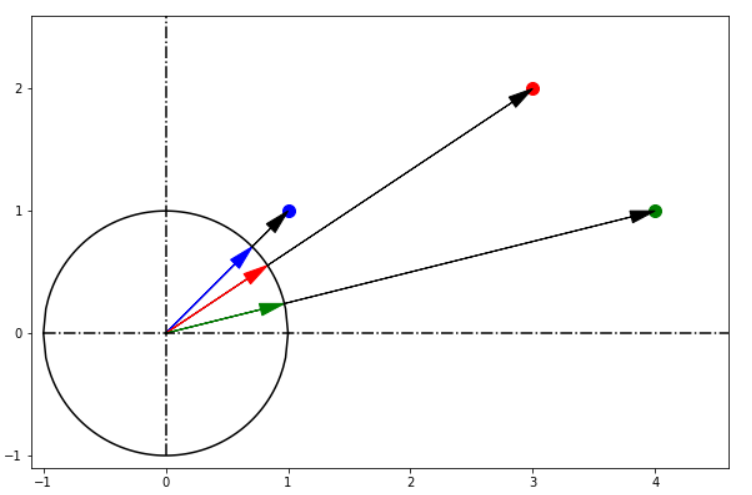

**Difference between Euclidean distance & cosine similarity**:

**Euclidean**

Our euclidean distance function can be defined as follows:

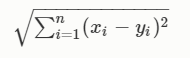



Where x
 and y
 are two vectors


**Cosine**

Our cosine similarity function can be defined as follows:

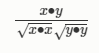

Where x
 and y
 are two vectors

Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter.

This happens for example when working with text data represented by word counts.

We could assume that when a word (e.g. science) occurs more frequent in document 1 than it does in document 2, that document 1 is more related to the topic of science.

However, it could also be the case that we are working with documents of uneven lengths (Wikipedia articles for example).

Then, science probably occurred more in document 1 just because it was way longer than document 2.

**Cosine similarity corrects for this.**

In [ ]:
import numpy as np
euclidean_distance = lambda x, y: np.sqrt(np.sum((x - y) ** 2))
cosine_similarity = lambda x, y: np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=a0077f9d4754c88cf0331f4c982a210db95e580a5093002e15da00e6d940e4b9
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia

q1 = wikipedia.page('machinelearning')
q2 = wikipedia.page('artifical intelligence')
q3 = wikipedia.page('chess')
q4 = wikipedia.page('soduku')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1.content, q2.content, q3.content, q4.content]).todense())
print("ML \t", len(q1.content.split()), "\n"
      "AI \t", len(q2.content.split()), "\n"
      "chess \t", len(q3.content.split()), "\n"
      "soduku \t", len(q4.content.split()))

ML 	 7761 
AI 	 9284 
chess 	 12475 
soduku 	 3076


In [ ]:
print("euclidean_distance")
print("ML - AI \t", euclidean_distance(X[0], X[1]), "\n"
      "ML - chess \t", euclidean_distance(X[0], X[2]), "\n"
      "ML - soduku \t", euclidean_distance(X[0], X[3]))

print("cosine_similarity")
print("ML - AI \t", cosine_similarity(X[0], X[1]), "\n"
      "ML - chess \t", cosine_similarity(X[0], X[2]), "\n"
      "ML - soduku \t", cosine_similarity(X[0], X[3]))

euclidean_distance
ML - AI 	 348.20827101032506 
ML - chess 	 823.792449589094 
ML - soduku 	 496.03729698481345
cosine_similarity
ML - AI 	 0.9008974284835287 
ML - chess 	 0.8144829746973173 
ML - soduku 	 0.7677182466225859


`model.similarity` computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.

In [ ]:
print(model.similarity('woman', 'man'))

0.76640123


In [ ]:
print(model.similarity('king', 'woman'))

0.12847973


### GloVe
by stanford (2014)<br>
word2vec learns word embeddings by making predictions in local
context windows. These models demonstrate the capacity to capture
complex linguistic patterns beyond word similarity, but fail to make use of the global co-occurrence statistics.<br>

In the begining they try word-word co-occurrences with SVD:

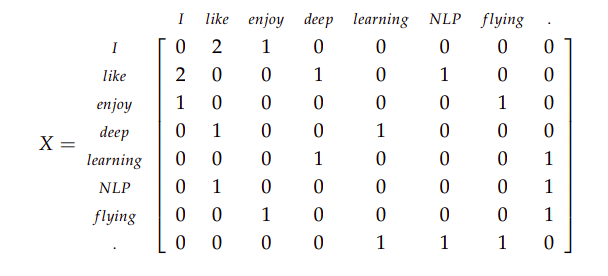

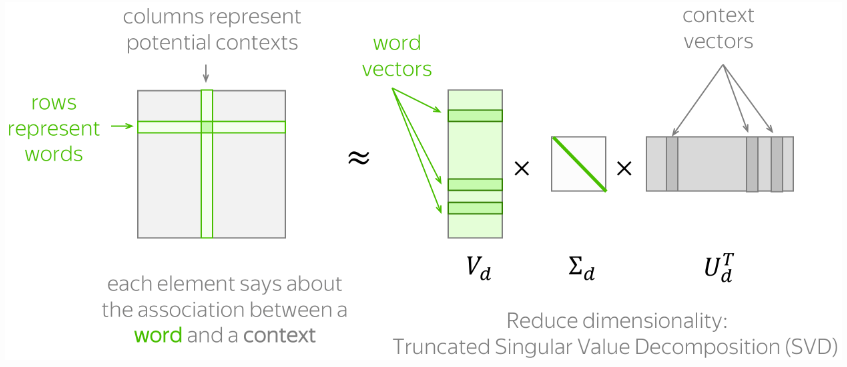


observe the singular values (the diagonal entries in the resulting S matrix), and cut them off at some index
k based on the desired percentage variance, We then take the submatrix of to be our word embedding matrix, but it did not work well, because:
- The dimensions of the matrix change very often (new words are
added very frequently and corpus changes in size).
- The matrix is extremely sparse since most words do not co-occur.
- The matrix is very high dimensional in general.
- Quadratic cost to train (i.e. to perform SVD)

*Glove* is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus.  The number of “contexts” is of course large, since it is essentially combinatorial in size.

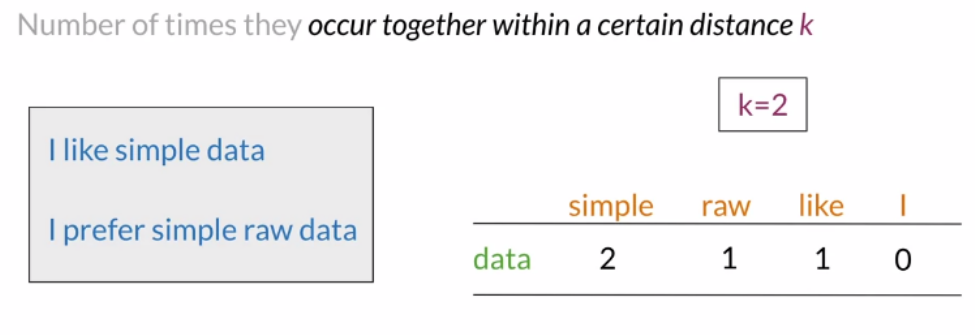



Since Raw counts are not sufficient, glove replaced raw counts with logarithm the conditional probabilities of the words in the columns to the words in the rows.

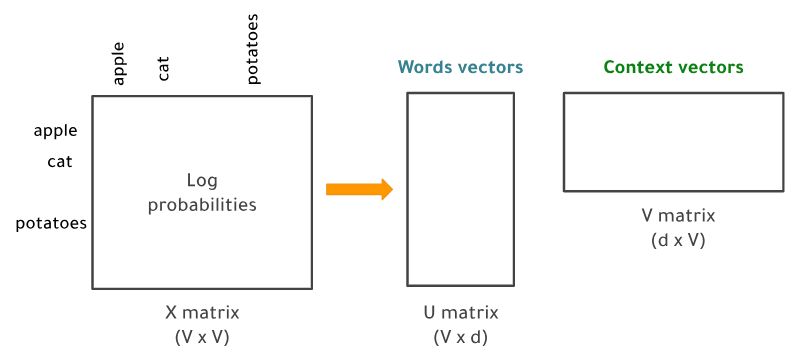

Glove converts the task to regression task, where it tries to find the vectors that dot product of them give the log of cell value related to vectors words:

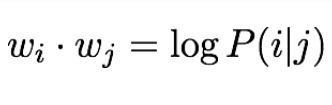

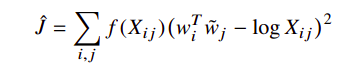

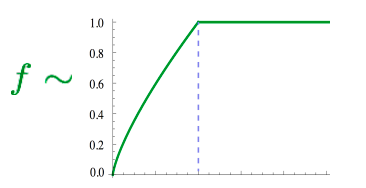

So then we factorize this matrix to yield a lower-dimensional (word x features) matrix, where each row now yields a vector representation for the corresponding word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.<br>

Advantages:
- Fast training
- Good performance even with
small corpus and small vectors

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.2/387.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8

In [ ]:
from flair.embeddings import WordEmbeddings
# init embedding
glove_embedding = WordEmbeddings('glove')

In [ ]:
from flair.data import Sentence
# create sentence.
sent1 = Sentence('The man was accused of robbing a bank.')

In [ ]:
# let's check the tokens:
print(sent1.tokens)

# now check out the tokens before embedding.
for token in sent1:
    print(token)
    print(token.embedding)

[Token[0]: "The", Token[1]: "man", Token[2]: "was", Token[3]: "accused", Token[4]: "of", Token[5]: "robbing", Token[6]: "a", Token[7]: "bank", Token[8]: "."]
Token[0]: "The"
tensor([])
Token[1]: "man"
tensor([])
Token[2]: "was"
tensor([])
Token[3]: "accused"
tensor([])
Token[4]: "of"
tensor([])
Token[5]: "robbing"
tensor([])
Token[6]: "a"
tensor([])
Token[7]: "bank"
tensor([])
Token[8]: "."
tensor([])


In [ ]:
# embed a sentence using glove.
glove_embedding.embed(sent1)

# now check out the embedded tokens.
for token in sent1:
    print(token)
    print(token.embedding)

Token[0]: "The"
tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459

In [ ]:
# now let's show the embedded token 'bank'
print(len(sent1[7].embedding))
print(sent1[7].embedding)

100
tensor([ 0.4187, -0.9221,  0.0487,  0.1180,  0.2206, -0.3251, -0.7846,  0.4379,
        -0.1476,  0.0631,  0.2375,  1.4837, -0.5476,  0.8041, -0.0038,  0.2495,
        -0.1552, -0.6626, -0.0604,  0.1012,  0.5116,  0.4329, -0.6086,  0.2208,
        -0.6227, -0.9374, -0.1998, -0.6987, -0.3368,  0.4086,  0.4630,  0.5937,
        -0.5655,  0.2497, -0.3798, -0.8486,  0.6076, -0.0354,  0.0627, -0.9490,
         0.1319, -1.0301, -0.0773,  0.8109,  0.1862,  0.4512,  0.3633,  0.4038,
        -0.7757, -1.2271, -0.4776,  0.0948,  1.0842,  0.7165, -0.8955, -2.4286,
        -0.6227, -0.7420,  1.4537,  1.1202,  0.1208, -0.5242, -0.0072,  0.4618,
         0.8240,  0.0577, -0.1121,  1.1369,  1.2533, -0.1648, -0.1894, -0.3425,
        -0.8230, -1.0924,  0.0319, -0.1441, -0.1145,  0.4376, -1.0946, -0.2936,
         1.9768,  0.1025, -0.5315,  0.0526, -0.5100, -0.1843, -0.1377, -0.2754,
         1.3457,  0.0614,  0.4384,  0.0322,  0.2206, -0.6545, -0.7246,  0.9515,
         0.8158, -0.1793,  0.4391,  

but, what about the other meaning of 'bank'?

In [ ]:
# create another sentence.
sent2 = Sentence("The man went fishing by the bank of the river.")

In [ ]:
# embed it.
glove_embedding.embed(sent2)

[Sentence[11]: "The man went fishing by the bank of the river."]

In [ ]:
sent2.tokens

[Token[0]: "The",
 Token[1]: "man",
 Token[2]: "went",
 Token[3]: "fishing",
 Token[4]: "by",
 Token[5]: "the",
 Token[6]: "bank",
 Token[7]: "of",
 Token[8]: "the",
 Token[9]: "river",
 Token[10]: "."]

In [ ]:
print(len(sent2[6].embedding))
print(sent2[6].embedding)

100
tensor([ 0.4187, -0.9221,  0.0487,  0.1180,  0.2206, -0.3251, -0.7846,  0.4379,
        -0.1476,  0.0631,  0.2375,  1.4837, -0.5476,  0.8041, -0.0038,  0.2495,
        -0.1552, -0.6626, -0.0604,  0.1012,  0.5116,  0.4329, -0.6086,  0.2208,
        -0.6227, -0.9374, -0.1998, -0.6987, -0.3368,  0.4086,  0.4630,  0.5937,
        -0.5655,  0.2497, -0.3798, -0.8486,  0.6076, -0.0354,  0.0627, -0.9490,
         0.1319, -1.0301, -0.0773,  0.8109,  0.1862,  0.4512,  0.3633,  0.4038,
        -0.7757, -1.2271, -0.4776,  0.0948,  1.0842,  0.7165, -0.8955, -2.4286,
        -0.6227, -0.7420,  1.4537,  1.1202,  0.1208, -0.5242, -0.0072,  0.4618,
         0.8240,  0.0577, -0.1121,  1.1369,  1.2533, -0.1648, -0.1894, -0.3425,
        -0.8230, -1.0924,  0.0319, -0.1441, -0.1145,  0.4376, -1.0946, -0.2936,
         1.9768,  0.1025, -0.5315,  0.0526, -0.5100, -0.1843, -0.1377, -0.2754,
         1.3457,  0.0614,  0.4384,  0.0322,  0.2206, -0.6545, -0.7246,  0.9515,
         0.8158, -0.1793,  0.4391,  

Is it the same?!!!

In [ ]:
cosine_similarity(sent1[7].embedding, sent2[6].embedding)

1.0

### fasttext
by facebook (2016)<br>
Popular models that learn such representations ignore the morphology of words, by assigning a distinct vector to each word.<br>
The main improvement of FastText over the original word2vec vectors (skipgram) is the inclusion of character n-grams, which allows computing word representations for words that did not appear in the training data (“out-of-vocabulary” words).<br>

Each word w is represented as a bag of character n-gram. We add special boundary symbols < and > at the beginning and end of words, allowing to distinguish prefixes and suffixes from other character sequences. We also include the word w itself in the
set of its n-grams, to learn a representation for each
word (in addition to character n-grams).<br>

Taking the word 'where' and n = 3 as an example, it will be
represented by the character n-grams:<br>
<font color=green><wh, whe, her, ere, re></font><br>
and the special sequence
<font color=green>< where ></font><br>
Note that the sequence < her >, corresponding to the word her is different from the tri-gram her from the word where.

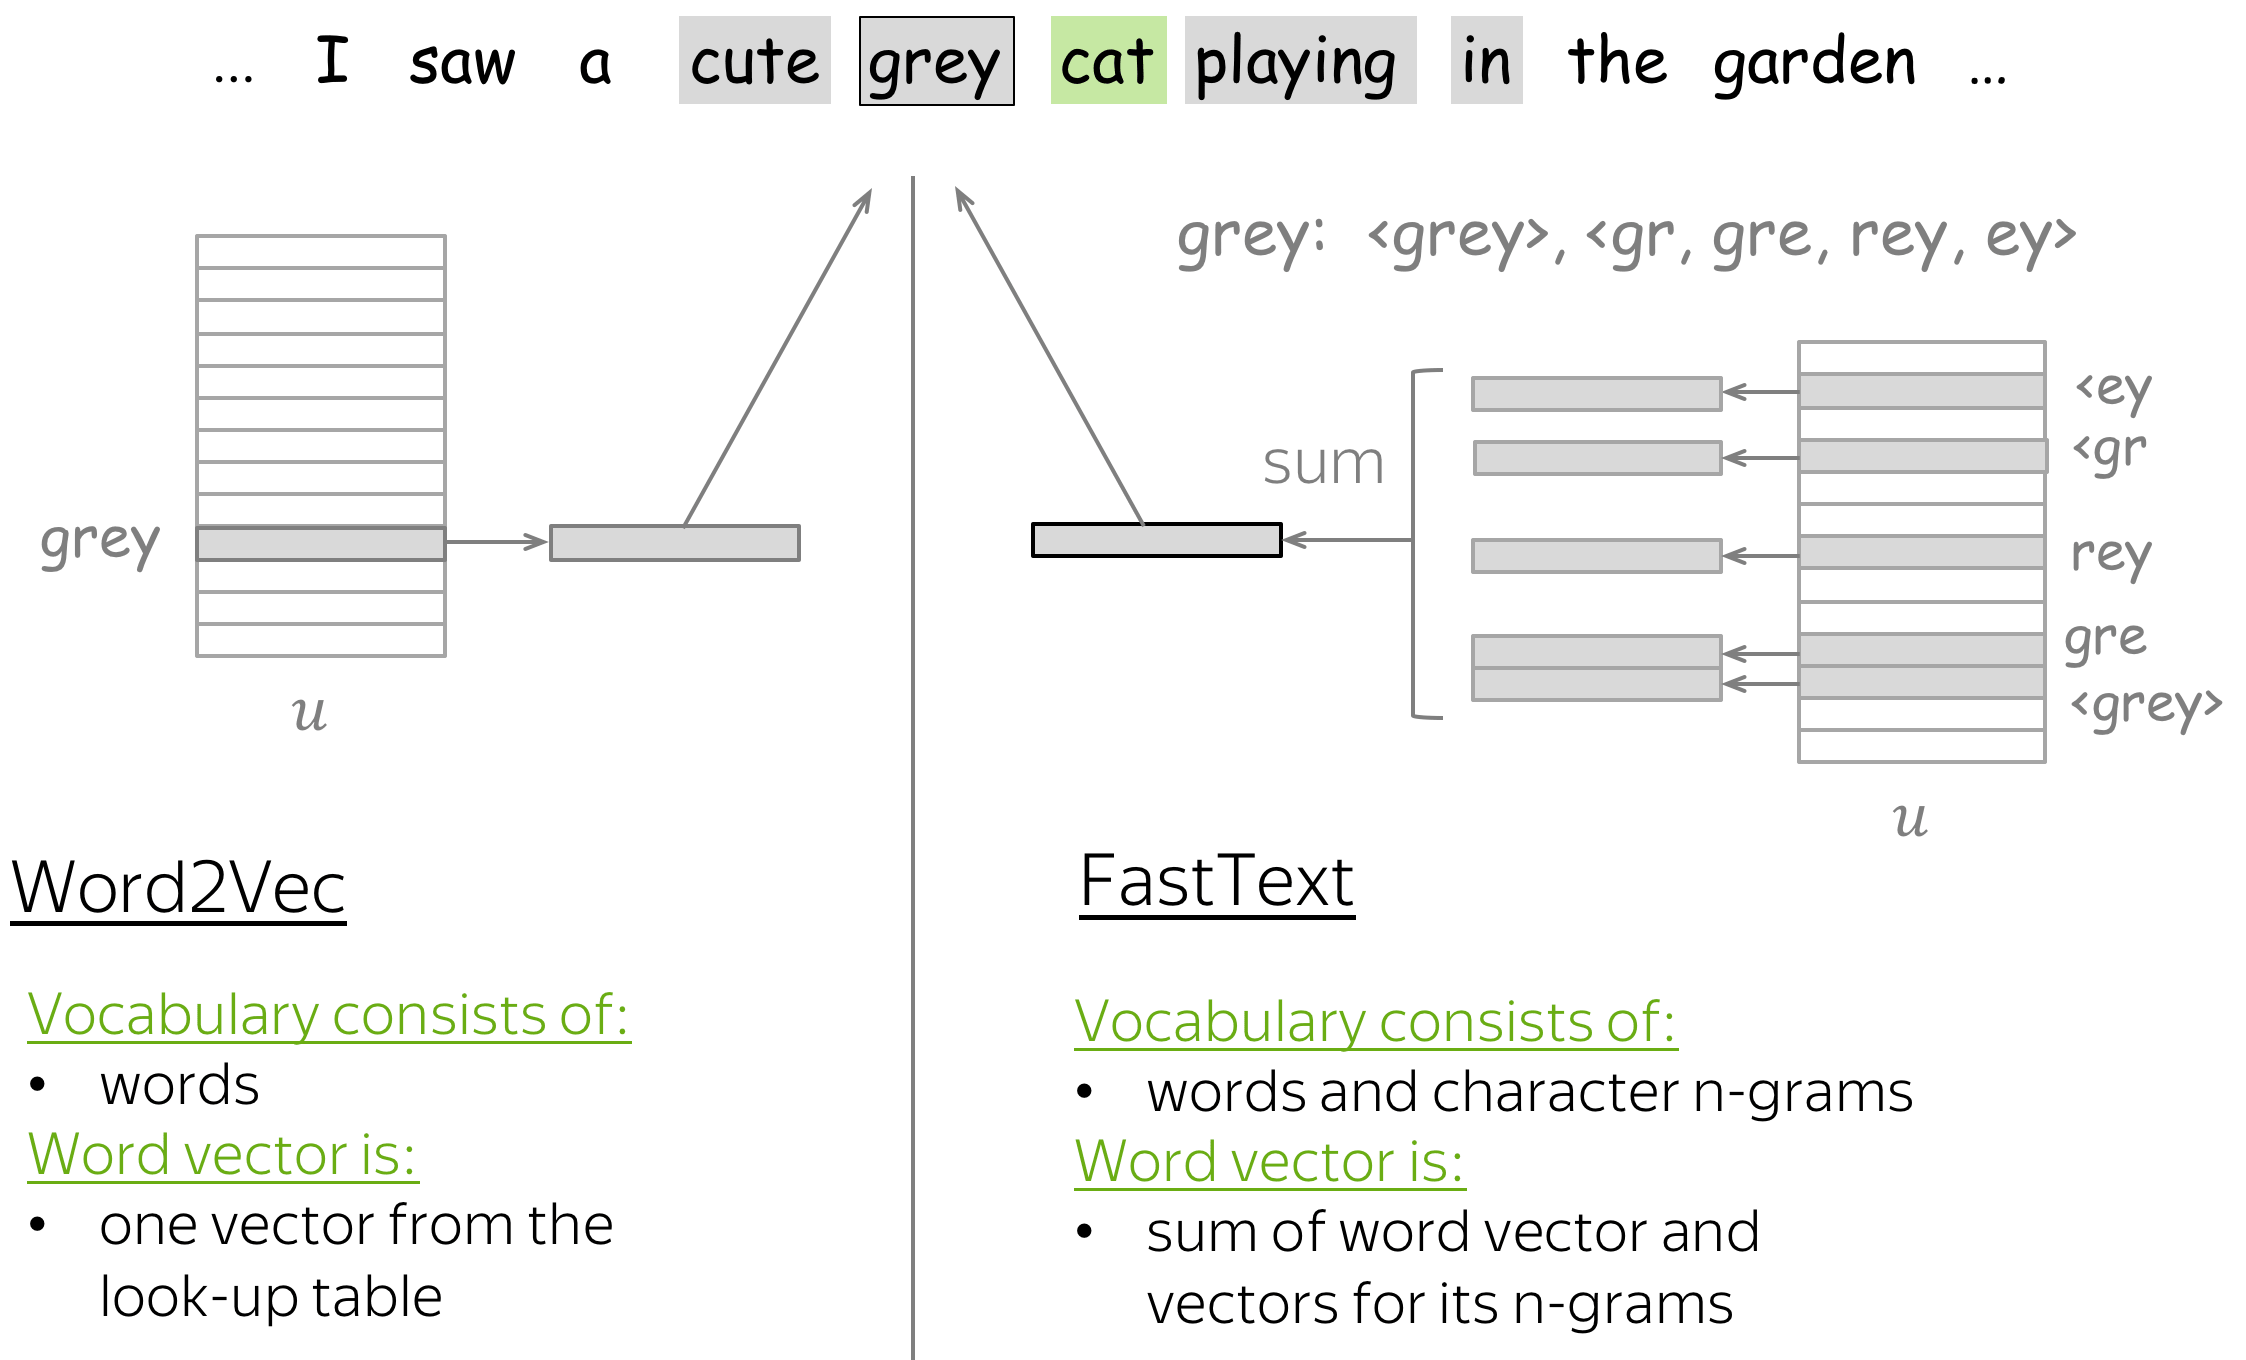


##### Wordpiece Tokenizer (Not embedding but tokenization method)
It is a sort of subwords method, it starts from a small vocabulary including the special tokens used by the model and the initial alphabet. Since it identifies subwords by adding a prefix (like ##), each word is initially split by adding that prefix to all the characters inside the word. So, for instance, "word" gets split like this:
<font color=orange>
w ##o ##r ##d</font>

In [ ]:
word_freqs = {'This': 3, 'is': 2, 'the': 1, 'Hugging': 1, 'Face': 1, 'Course': 1, '.': 4, 'chapter': 1, 'about': 1,
    'tokenization': 1, 'section': 1, 'shows': 1, 'several': 1, 'tokenizer': 1, 'algorithms': 1, 'Hopefully': 1,
    ',': 1, 'you': 1, 'will': 1, 'be': 1, 'able': 1, 'to': 1, 'understand': 1, 'how': 1, 'they': 1, 'are': 1,
    'trained': 1, 'and': 1, 'generate': 1, 'tokens': 1}

In [ ]:
alphabet = []
for word in word_freqs.keys():
    if word[0] not in alphabet:
        alphabet.append(word[0])
    for letter in word[1:]:
        if f"##{letter}" not in alphabet:
            alphabet.append(f"##{letter}")

alphabet.sort()
print(alphabet)

['##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y']


In [ ]:
splits = {
    word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
    for word in word_freqs.keys()
}

print(splits)

{'This': ['T', '##h', '##i', '##s'], 'is': ['i', '##s'], 'the': ['t', '##h', '##e'], 'Hugging': ['H', '##u', '##g', '##g', '##i', '##n', '##g'], 'Face': ['F', '##a', '##c', '##e'], 'Course': ['C', '##o', '##u', '##r', '##s', '##e'], '.': ['.'], 'chapter': ['c', '##h', '##a', '##p', '##t', '##e', '##r'], 'about': ['a', '##b', '##o', '##u', '##t'], 'tokenization': ['t', '##o', '##k', '##e', '##n', '##i', '##z', '##a', '##t', '##i', '##o', '##n'], 'section': ['s', '##e', '##c', '##t', '##i', '##o', '##n'], 'shows': ['s', '##h', '##o', '##w', '##s'], 'several': ['s', '##e', '##v', '##e', '##r', '##a', '##l'], 'tokenizer': ['t', '##o', '##k', '##e', '##n', '##i', '##z', '##e', '##r'], 'algorithms': ['a', '##l', '##g', '##o', '##r', '##i', '##t', '##h', '##m', '##s'], 'Hopefully': ['H', '##o', '##p', '##e', '##f', '##u', '##l', '##l', '##y'], ',': [','], 'you': ['y', '##o', '##u'], 'will': ['w', '##i', '##l', '##l'], 'be': ['b', '##e'], 'able': ['a', '##b', '##l', '##e'], 'to': ['t', '##o'],

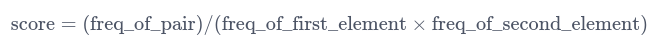

In [ ]:
from collections import defaultdict

def compute_pair_scores(splits):
    letter_freqs = defaultdict(int)
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1:
            letter_freqs[split[0]] += freq
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            letter_freqs[split[i]] += freq
            pair_freqs[pair] += freq
        letter_freqs[split[-1]] += freq

    scores = {
        pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
        for pair, freq in pair_freqs.items()
    }
    return scores

In [ ]:
pair_scores = compute_pair_scores(splits)
for i, key in enumerate(pair_scores.keys()):
    print(f"{key}: {pair_scores[key]}")
    if i >= 5:
        break

('T', '##h'): 0.125
('##h', '##i'): 0.03409090909090909
('##i', '##s'): 0.02727272727272727
('i', '##s'): 0.1
('t', '##h'): 0.03571428571428571
('##h', '##e'): 0.011904761904761904


In [ ]:
best_pair = ""
max_score = None
for pair, score in pair_scores.items():
    if max_score is None or max_score < score:
        best_pair = pair
        max_score = score

print(best_pair, max_score)

('a', '##b') 0.2


In [ ]:
alphabet.append("ab")

In [ ]:
def merge_pair(a, b, splits):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue
        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                merge = a + b[2:] if b.startswith("##") else a + b
                split = split[:i] + [merge] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits

In [ ]:
splits = merge_pair("a", "##b", splits)
splits["about"]

['ab', '##o', '##u', '##t']

let's put all step together by looping until we have learned all the merges we want. Let’s aim for a vocab size of 70:

In [ ]:
vocab_size = 70
while len(alphabet) < vocab_size:
    scores = compute_pair_scores(splits)
    best_pair, max_score = "", None
    for pair, score in scores.items():
        if max_score is None or max_score < score:
            best_pair = pair
            max_score = score
    splits = merge_pair(*best_pair, splits)
    new_token = (
        best_pair[0] + best_pair[1][2:]
        if best_pair[1].startswith("##")
        else best_pair[0] + best_pair[1]
    )
    alphabet.append(new_token)

In [ ]:
print(alphabet)

['##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y', 'ab', '##fu', 'Fa', 'Fac', '##ct', '##ful', '##full', '##fully', 'Th', 'ch', '##hm', 'cha', 'chap', 'chapt', '##thm', 'Hu', 'Hug', 'Hugg', 'sh', 'th', 'is', '##thms', '##za', '##zat', '##ut', '##ta', '##at', '##sta', '##ra', '##rsta']


For a phrase we can find the average of the words vectors in it to get a vector for it.


**Problems**:<br>
1. the problem with these methods is that they give one static vector for each word.
what about the word "bank" :
- “The man was accused of robbing a bank.”
- “The man went fishing by the bank of the river.”

The solution:
- Cluster word windows around words
- contextual representaion (bert, roberta, ... etc)

2. Word embeddings are trained from the whole web, and this data
encodes biases about the real world, for example:

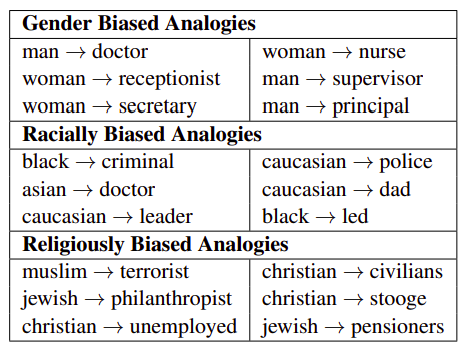


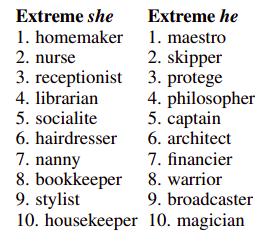

## Word embedding for our problem
First you need to tokenize the data into a format that can be used by the word embeddings. Keras offers a couple of convenience methods for text preprocessing and sequence preprocessing which you can employ to prepare your text.

You can start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter `num_words`, which is responsible for setting the size of the vocabulary. The most common `num_words` words will be then kept. I have the testing and training data prepared from the previous example:

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])
print(tokenizer.sequences_to_texts([X_train[2]]))

Of all the dishes, the salmon was the best, but all were great.
[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]
['of all the dishes the salmon was the best but all were great']


In [ ]:
vocab_size

1747

Note: Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s `CountVectorizer`.

With `CountVectorizer`, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With `Tokenizer`, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary `tokenizer.word_index`.

One problem that we have is that each text sequence has in most cases different length of words. To counter this, you can use `pad_sequence()` which simply pads the sequence of words with zeros. By default, it prepends zeros but we want to append them. Typically it does not matter whether you prepend or append zeros.

Additionally you would want to add a maxlen parameter to specify how long the sequences should be. This cuts sequences that exceed that number. In the following code, you can see how to pad sequences with Keras:

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

The first values represent the index in the vocabulary as you have learned from the previous examples. You can also see that the resulting feature vector contains mostly zeros, since you have a fairly short sentence. In the next part you will see how to work with word embeddings in Keras.

### Keras Embedding Layer
Notice that, at this point, our data is still hardcoded. We have not told Keras to learn a new embedding space through successive tasks. Now you can use the Embedding Layer of Keras which takes the previously calculated integers and maps them to a dense vector of the embedding. You will need the following parameters:

- **input_dim**: the size of the vocabulary
- **output_dim**: the size of the dense vector
- **input_length**: the length of the sequence

With the `Embedding` layer we have now a couple of options. One way would be to take the output of the embedding layer and plug it into a `Dense` layer. In order to do this you have to add a Flatten layer in between that prepares the sequential input for the `Dense` layer:

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           87350     
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 10)                50010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 137371 (536.61 KB)
Trainable params: 137371 (536.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You can now see that we have 87350 new parameters to train. This number comes from `vocab_size` times the `embedding_dim`. These weights of the embedding layer are initialized with random weights and are then adjusted through backpropagation during training. This model takes the words as they come in the order of the sentences as input vectors. You can train it with the following:

Training Accuracy: 0.9507
Testing Accuracy:  0.7480


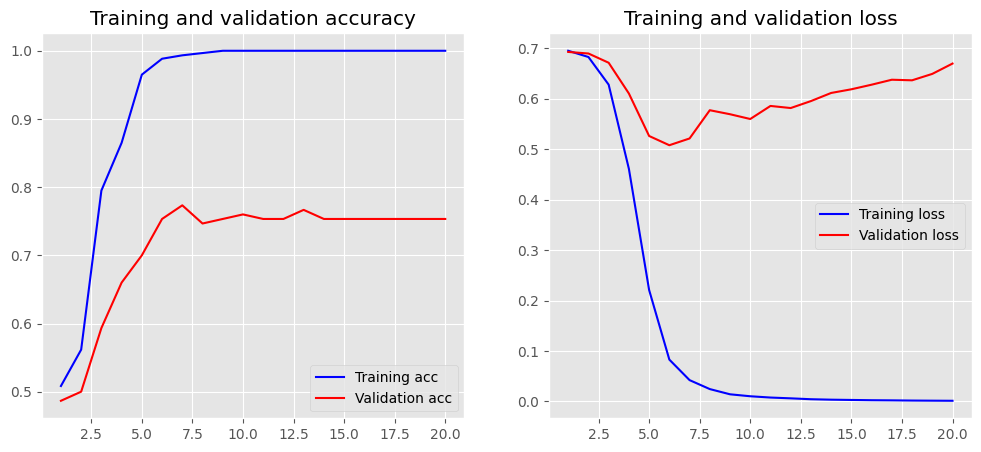

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_split = 0.2,
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

This is typically a not very reliable way to work with sequential data as you can see in the performance. When working with sequential data you want to focus on methods that look at local and sequential information instead of absolute positional information.

Another way to work with embeddings is by using a `MaxPooling1D`/`AveragePooling1D` or a `GlobalMaxPooling1D`/`GlobalAveragePooling1D` layer after the embedding. You can think of the pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors.

In the case of max pooling you take the maximum value of all features in the pool for each feature dimension. In the case of average pooling you take the average, but max pooling seems to be more commonly used as it highlights large values.

Global max/average pooling takes the maximum/average of all features whereas in the other case you have to define the pool size. Keras has again its own layer that you can add in the sequential model:

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           87350     
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 87871 (343.25 KB)
Trainable params: 87871 (343.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The procedure for training does not change:

Training Accuracy: 0.9547
Testing Accuracy:  0.7800


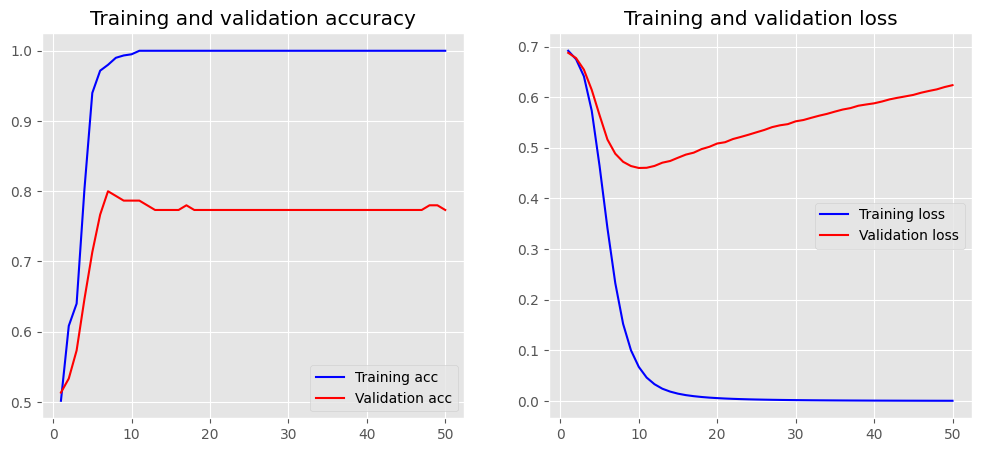

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_split = 0.2,
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

You can already see some improvements in our models. Next you’ll see how we can employ pretrained word embeddings and if they help us with our model.

Using Pretrained Word Embeddings
We just saw an example of jointly learning word embeddings incorporated into the larger model that we want to solve.

An alternative is to use a precomputed embedding space that utilizes a much larger corpus. It is possible to precompute word embeddings by simply training them on a large corpus of text.

In this section, you’ll see how to work with the GloVe word embeddings from the Stanford NLP Group as their size is more manageable than the Word2Vec word embeddings provided by Google. Go ahead and download the 6B (trained on 6 billion words) word embeddings from [here](https://nlp.stanford.edu/projects/glove/) (glove.6B.zip, 822 MB).



In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-11-01 21:39:10--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-01 21:39:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2023-11-01 21:41:50 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip 'glove.6B.zip' -d 'data'

Archive:  glove.6B.zip
  inflating: data/glove.6B.50d.txt   
  inflating: data/glove.6B.100d.txt  
  inflating: data/glove.6B.200d.txt  
  inflating: data/glove.6B.300d.txt  


You can find other word embeddings also on the main GloVe page. You can find the pretrained Word2Vec embeddings by Google here. If you want to train your own word embeddings, you can do so efficiently with the gensim Python package which uses Word2Vec for calculation. More details on how to do this here.

Now that we got you covered, you can start using the word embeddings in your models. You can see in the next example how you can load the embedding matrix. Each line in the file starts with the word and is followed by the embedding vector for the particular word.

This is a large file with 400000 lines, with each line representing a word followed by its vector as a stream of floats. For example, here are the first 50 characters of the first line:

In [ ]:
 # the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.04445

Since you don’t need all words, you can focus on only the words that we have in our vocabulary. Since we have only a limited number of words in our vocabulary, we can skip most of the 40000 words in the pretrained word embeddings:



In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

You can use this function now to retrieve the embedding matrix:

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'data/glove.6B.50d.txt',
    # 'GoogleNews-vectors-negative300.bin',
    tokenizer.word_index, embedding_dim)

Wonderful! Now you are ready to use the embedding matrix in training. Let’s go ahead and use the previous network with global max pooling and see if we can improve this model. When you use pretrained word embeddings you have the choice to either allow the embedding to be updated during training or only use the resulting embedding vectors as they are.

First, let’s have a quick look how many of the embedding vectors are nonzero:

In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.9507727532913566

This means 95.1% of the vocabulary is covered by the pretrained model, which is a good coverage of our vocabulary. Let’s have a look at the performance when using the `GlobalMaxPool1D` layer:

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           87350     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 50)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 87871 (343.25 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 87350 (341.21 KB)
_________________________________________________________________


Training Accuracy: 0.7440
Testing Accuracy:  0.7000


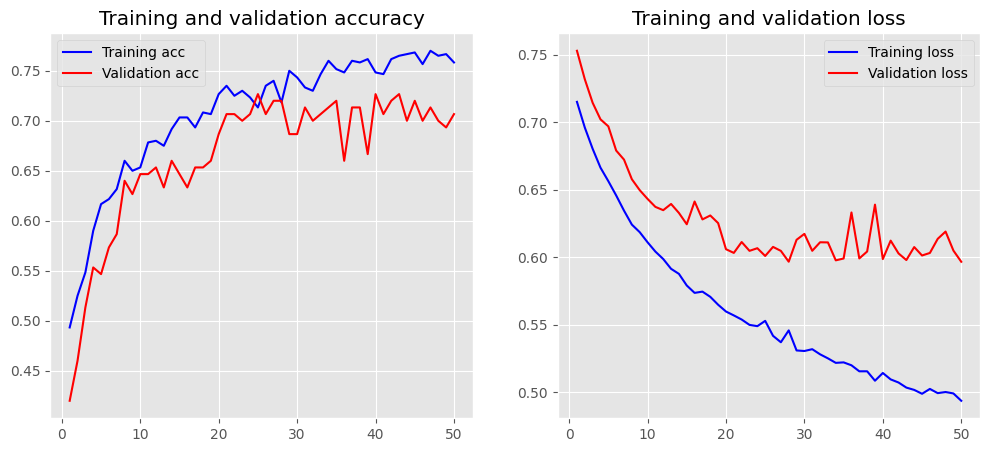

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_split = 0.2,
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Since the word embeddings are not additionally trained, it is expected to be lower. But let’s now see how this performs if we allow the embedding to be trained by using` trainable=True`:

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           87350     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 50)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 87871 (343.25 KB)
Trainable params: 87871 (343.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training Accuracy: 0.9547
Testing Accuracy:  0.7520


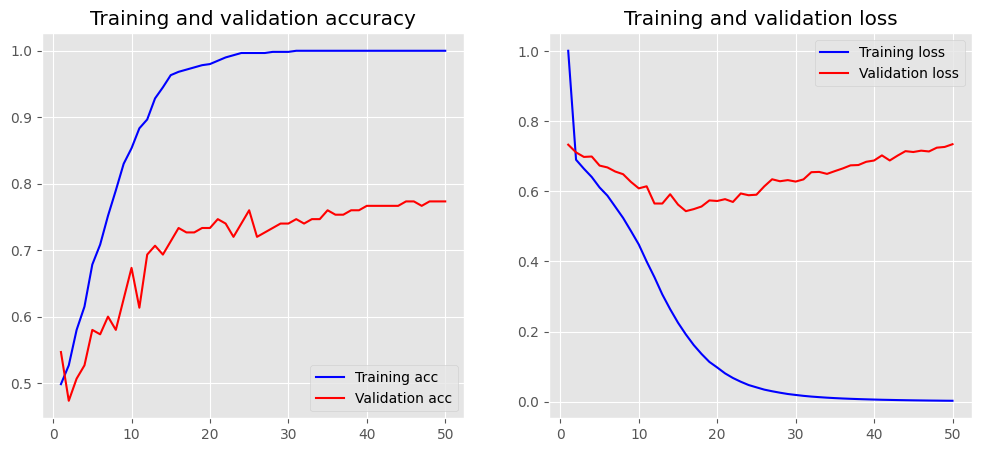

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_split = 0.2,
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

You can see that it is most effective to allow the embeddings to be trained. When dealing with large training sets it can boost the training process to be much faster than without. In our case it seemed to help but not by much. This does not have to be because of pretrained word embeddings.

Now it is time to focus on a more advanced neural network model to see if it is possible to boost the model and give it the leading edge over the previous models.

### Convolutional Neural Networks (CNN)
Convolutional neural networks or also called convnets are one of the most exciting developments in machine learning in recent years.

They have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. You can imagine a CNN as a specialized neural network that is able to detect specific patterns.

If it is just another neural network, what differentiates it from what you have previously learned?

A CNN has hidden layers which are called convolutional layers. When you think of images, a computer has to deal with a two dimensional matrix of numbers and therefore you need some way to detect features in this matrix. These convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. The convolutional layer consists of multiple filters which are slid across the image and are able to detect specific features.

This is the very core of the technique, the mathematical process of convolution. With each convolutional layer the network is able to detect more complex patterns. In the Feature Visualization by Chris Olah you can get a good intuition what these features can look like.

When you are working with sequential data, like text, you work with one dimensional convolutions, but the idea and the application stays the same. You still want to pick up on patterns in the sequence which become more complex with each added convolutional layer.

In the next figure you can see how such a convolution works. It starts by taking a patch of input features with the size of the filter kernel. With this patch you take the dot product of the multiplied weights of the filter. The one dimensional convnet is invariant to translations, which means that certain sequences can be recognized at a different position. This can be helpful for certain patterns in the text:

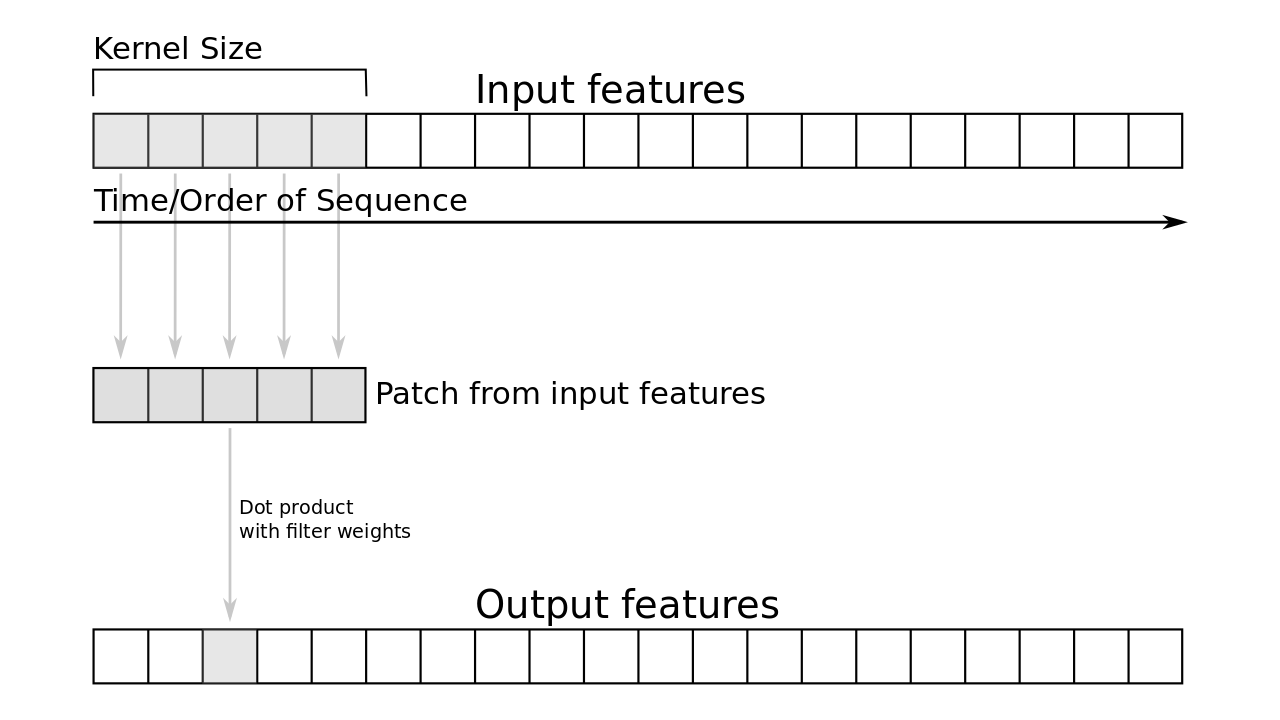

Now let’s have a look how you can use this network in Keras. Keras offers again various Convolutional layers which you can use for this task. The layer you’ll need is the `Conv1D` layer. This layer has again various parameters to choose from. The ones you are interested in for now are the number of filters, the kernel size, and the activation function. You can add this layer in between the Embedding layer and the `GlobalMaxPool1D` layer:



In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          174700    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 240129 (938.00 KB)
Trainable params: 240129 (938.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Training Accuracy: 0.9467
Testing Accuracy:  0.7680


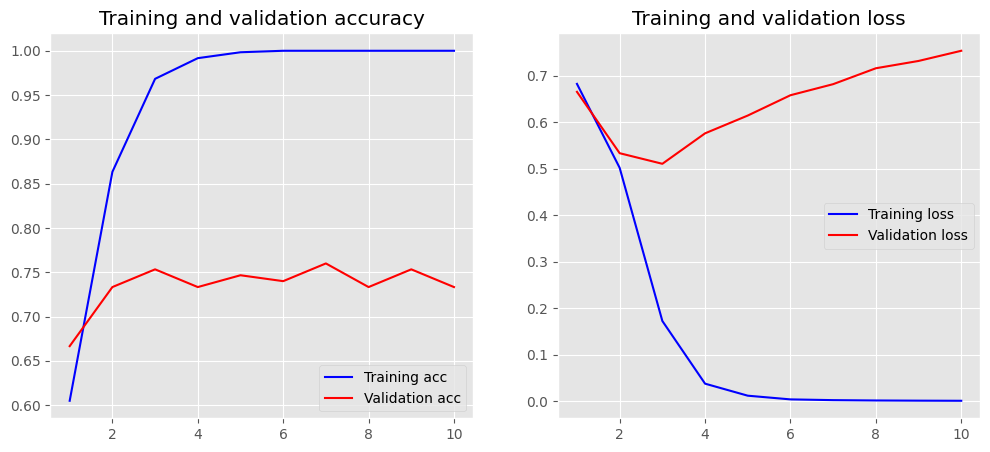

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_split = 0.2,
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

You can see that accuracy seems to be tough hurdle to overcome with this data set and a CNN might not be well equipped. The reason for such a plateau might be that:

- There are not enough training samples
- The data you have does not generalize well
- Missing focus on tweaking the hyperparameters

CNNs work best with large training sets where they are able to find generalizations where a simple model like logistic regression won’t be able.

### Hyperparameters Optimization
One crucial steps of deep learning and working with neural networks is hyperparameter optimization.

As you saw in the models that we have used so far, even with simpler ones, you had a large number of parameters to tweak and choose from. Those parameters are called hyperparameters. This is the most time consuming part of machine learning and sadly there are no one-fits-all solutions ready.

When you have a look at the competitions on Kaggle, one of the largest places to compete against other fellow data scientists, you can see that many of the winning teams and models have gone through a lot of tweaking and experimenting until they reached their prime. So don’t get discouraged when it gets tough and you reach a plateau, but rather think about the ways you could optimize the model or the data.

One popular method for hyperparameter optimization is grid search. What this method does is it takes lists of parameters and it runs the model with each parameter combination that it can find. It is the most thorough way but also the most computationally heavy way to do this. Another common way, random search, which you’ll see in action here, simply takes random combinations of parameters.

In order to apply random search with Keras, you will need to use the KerasClassifier which serves as a wrapper for the scikit-learn API. With this wrapper you are able to use the various tools available with scikit-learn like cross-validation. The class that you need is RandomizedSearchCV which implements random search with cross-validation. Cross-validation is a way to validate the model and take the whole data set and separate it into multiple testing and training data sets.

There are various types of cross-validation. One type is the k-fold cross-validation which you’ll see in this example. In this type the data set is partitioned into k equal sized sets where one set is used for testing and the rest of the partitions are used for training. This enables you to run k different runs, where each partition is once used as a testing set. So, the higher k is the more accurate the model evaluation is, but the smaller each testing set is.

First step for KerasClassifier is to have a function that creates a Keras model. We will use the previous model, but we will allow various parameters to be set for the hyperparameter optimization:

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Next, you want to define the parameter grid that you want to use in training. This consists of a dictionary with each parameters named as in the previous function. The number of spaces on the grid is 3 * 3 * 1 * 1 * 1, where each of those numbers is the number of different choices for a given parameter.

You can see how this could get computationally expensive very quickly, but luckily both grid search and random search are embarrassingly parallel, and the classes come with an n_jobs parameter that lets you test grid spaces in parallel. The parameter grid is initialized with the following dictionary:

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000],
                  embedding_dim=[50],
                  maxlen=[100])

Now you are already ready to start running the random search. In this example we iterate over each data set and then you want to preprocess the data in the same way as previously. Afterwards you take the previous function and add it to the KerasClassifier wrapper class including the number of epochs.

The resulting instance and the parameter grid are then used as the estimator in the RandomSearchCV class. Additionally, you can choose the number of folds in the k-folds cross-validation, which is in this case 4. You have seen most of the code in this snippet before in our previous examples. Besides the RandomSearchCV and KerasClassifier, I have added a little block of code handling the evaluation:

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen],
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
    prompt = input(f'finished {source}; write to file and proceed? [y/n]')
    if prompt.lower() not in {'y', 'true', 'yes'}:
        break
    with open(output_file, 'a') as f:
        s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
        print(output_string)
        f.write(output_string)

Running grid search for data set : amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


Interesting! For some reason the testing accuracy is higher than the training accuracy which might be because there is a large variance in the scores during cross-validation. We can see that we were still not able to break much through the dreaded 80%, which seems to be a natural limit for this data with its given size. Remember that we have a small data set and convolutional neural networks tend to perform the best with large data sets.

## Sources

https://www.youtube.com/watch?v=rmVRLeJRkl4&list=PLoROMvodv4rOSH4v6133s9LFPRHjEmbmJ

https://www.youtube.com/watch?v=gqaHkPEZAew&list=PLoROMvodv4rOSH4v6133s9LFPRHjEmbmJ&index=2

https://huggingface.co/learn/nlp-course/chapter6/6?fw=pt

http://jalammar.github.io/illustrated-word2vec/